# S18 - Part B - VAE with CIFAR10

#### Imports

In [1]:
import torch
from CustomVAE import VAE
from CIFAR10DataModule import CIFAR10DataModuleCustom

c:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
c:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\pl_bolts\__init__.py:11: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
c:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\pl_bolts\__init__.py:11: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
c:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-pac

#### Load Datamodule with dataset

In [2]:
datamodule = CIFAR10DataModuleCustom()

#### Train Data

In [3]:
import pytorch_lightning as pl

pl.seed_everything(1234)
model_vae = VAE()
trainer = pl.Trainer(gpus=1, max_epochs=30)
trainer.fit(model_vae, datamodule)

Global seed set to 1234
d:\SRT_Courses\MachineLearning\TSAI\Session18\Part2\CustomVAE.py:18: UnderReviewWarning: The feature resnet18_encoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  self.encoder = resnet18_encoder(False, False)
c:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\pl_bolts\models\autoencoders\components.py:334: UnderReviewWarning: The feature ResNetEncoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  return ResNetEncoder(EncoderBlock, [2, 2, 2, 2], first_conv, maxpool1)
c:

Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type          | Params
------------------------------------------
0 | encoder | ResNetEncoder | 11.2 M
1 | decoder | ResNetDecoder | 8.6 M 
2 | fc_mu   | Linear        | 133 K 
3 | fc_var  | Linear        | 133 K 
------------------------------------------
20.1 M    Trainable params
0         Non-trainable params
20.1 M    Total params
80.249    Total estimated model params size (MB)
c:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:   2%|▏         | 12/782 [00:23<25:27,  1.98s/it, loss=6.25e+03, v_num=16] 

c:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\trainer\call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


#### Plot Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


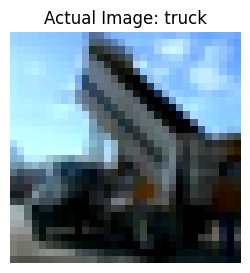

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


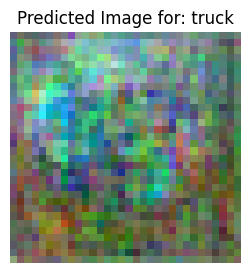

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

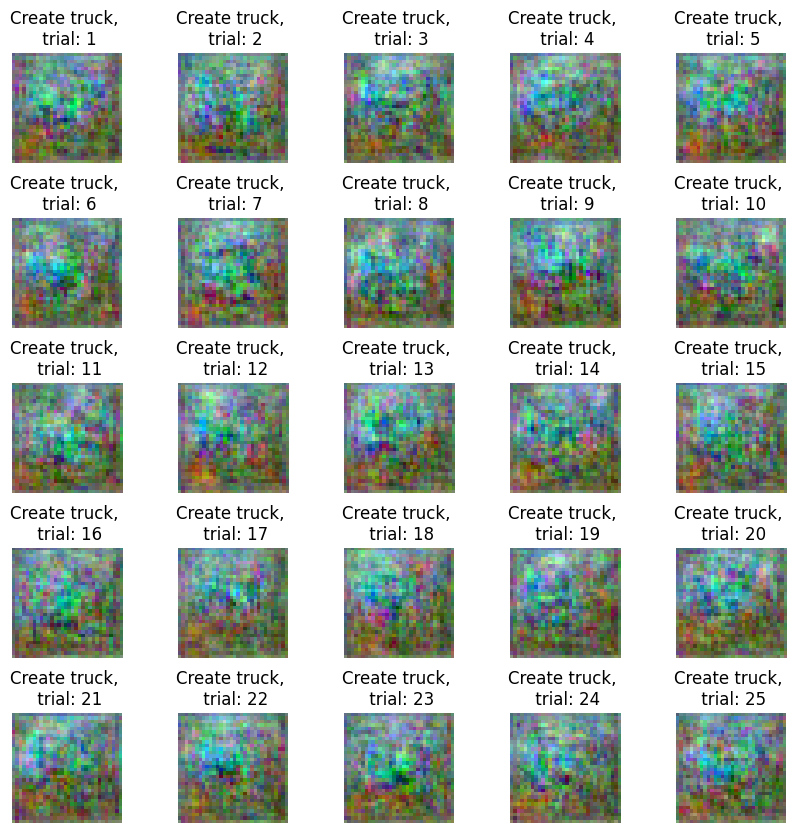

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, figure
import numpy as np
from torchvision.utils import make_grid
from pl_bolts.transforms.dataset_normalizations import cifar10_normalization
import random

test_dl = datamodule.test_dataloader()
for batch in test_dl:
    images, label_ohe, label_ohe_random= batch
    break  # Break to get the first batch (a batch of images and labels)

# Select one image and its corresponding label OHE
index = random.randint(0, 63)
image = images[index]
label_ohe_valid= label_ohe[index]
label_ohe_invalid = label_ohe_random[index]

# Define CIFAR-10 class labels
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get the CIFAR10 labels
label_valid = cifar10_classes[np.argmax(label_ohe_valid)]
label_invalid = cifar10_classes[np.argmax(label_ohe_invalid)]

# UNDO DATA NORMALIZATION
normalize = cifar10_normalization()
mean, std = np.array(normalize.mean), np.array(normalize.std)
# PyTorch stores images as (C, H, W), so we transpose it to (H, W, C)
img = image.permute(1, 2, 0).numpy()*std + mean 

# PLOT IMAGES
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(img)  
plt.title(f"Actual Image: {label_valid}")  # Set the title as the class label
plt.axis('off')  # Turn off axis labels
plt.show()

image = image.unsqueeze(0)

with torch.no_grad():
    
    # Now pass this image through VAE encoder and plot the decoder output
    encoded_image = model_vae.encoder(image.to('cuda'))
    combined_features = torch.cat((encoded_image, label_ohe_valid.unsqueeze(0).to('cuda')), dim=1) #get OHE for label features
    mu, log_var = model_vae.fc_mu(combined_features), model_vae.fc_var(combined_features)

    # sample z from q
    std_ = torch.exp(log_var / 2)
    q = torch.distributions.Normal(mu, std_)
    z = q.rsample()

    # decoded 
    decoded_image = model_vae.decoder(z).to('cpu')

decoded_img = decoded_image[0].permute(1, 2, 0).numpy()*std + mean

# Plot the generated image with actual label
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(decoded_img)
plt.axis('off')
plt.title(f"Predicted Image for: {label_valid}")
plt.show()

decoded_images = []
decoded_images_plot = []
with torch.no_grad():
    
    for i in range(25):   
        if len(decoded_images) == 0:
            image = image
        else:
            image = decoded_images[-1]
        # Now pass this image through VAE encoder and plot the decoder output
        encoded_image = model_vae.encoder(image.to('cuda'))
        combined_features = torch.cat((encoded_image, label_ohe_invalid.unsqueeze(0).to('cuda')), dim=1) #get OHE for label features
        mu, log_var = model_vae.fc_mu(combined_features), model_vae.fc_var(combined_features)

        # sample z from q
        std_ = torch.exp(log_var / 2)
        q = torch.distributions.Normal(mu, std_)
        z = q.rsample()

        # decoded 
        decoded_image = model_vae.decoder(z)
        decoded_images.append(decoded_image)
        decoded_image = decoded_image.to('cpu')
        decoded_images_plot.append(decoded_image[0].permute(1, 2, 0).numpy()*std + mean)

# Plot the 25 images

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Flatten the axes array so that we can iterate over it easily
axes = axes.flatten()

# Iterate through the images and plot them in the subplots
for i, ax in enumerate(axes):
    ax.imshow(decoded_images_plot[i])  # Replace 'gray' with a colormap of your choice
    ax.set_title(f"Create {label_invalid}, \n trial: {i+1}")
    ax.axis('off')  # Turn off axis labels and ticks

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Display the plot
plt.show()